In [1]:
from sympy import *
x, y, z = symbols('x y z')
expr = sin(ln(x+1)**2)
expr.series(x, 0, 5)

x**2 - x**3 + 11*x**4/12 + O(x**5)

In [2]:
from anytree import Node, RenderTree
from anytree.exporter import DotExporter
# from graphviz import Source, render
# import os

n1 = Node('1')
n2 = Node('2', parent=n1)
n3 = Node('3', parent=n1)
n4 = Node('4', parent=n2)
n5 = Node('5', parent=n3)
n6 = Node('6', parent=n3)
n7 = Node('7', parent=n3)
print(RenderTree(n1))
DotExporter(n1).to_dotfile('simple_tree.dot')

#Source.from_file('simple_tree.dot')

#render('dot','png', 'simple_tree.dot')

Node('/1')
├── Node('/1/2')
│   └── Node('/1/2/4')
└── Node('/1/3')
    ├── Node('/1/3/5')
    ├── Node('/1/3/6')
    └── Node('/1/3/7')


In [3]:
import igraph as ig

graph = ig.Graph(directed=True)
graph.add_vertices(5)

for i in range(len(graph.vs)):
    graph.vs[i]['id'] = i
    graph.vs[i]['label'] = str(i)

graph.add_edges([(1,2), (3,4)])
weights = [8, 7]
graph.es['weight'] = weights
graph.es['label'] = weights

In [4]:
# ig.plot(graph)
# len(graph.es)
graph

Text(0.5, 1.0, 'Модифицированные второго рода')

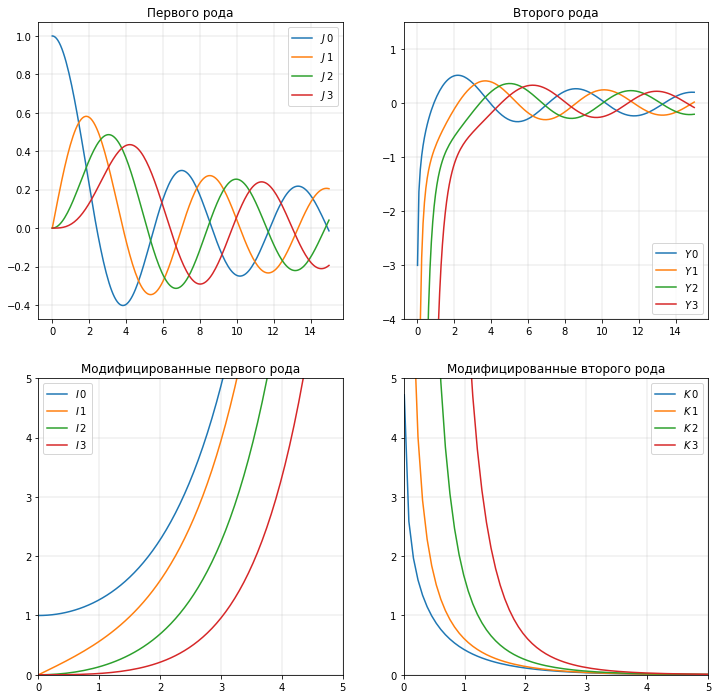

In [5]:
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

time = np.linspace(0,15,201)
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

for i in range(4):
    ax0.plot(time, [besselj(i, t) for t in time], label=f'$J\,{i}$')
    ax1.plot(time+0.01, [bessely(i, t) for t in time+0.01], label=f'$Y\,{i}$')
    ax2.plot(time, [besseli(i, t) for t in time], label=f'$I\,{i}$')
    ax3.plot(time+0.01, [besselk(i, t) for t in time+0.01], label=f'$K\,{i}$')

# оформление графиков
axs = [ax0, ax1, ax2, ax3]
for ax in axs:
    ax.grid(linewidth=0.3)
    ax.legend()

ax1.set_ylim(-4,1.5)

ax2.set_xlim(0,5)
ax2.set_ylim(0,5)

ax3.set_xlim(0,5)
ax3.set_ylim(0,5)

ax0.set_title('Первого рода')
ax1.set_title('Второго рода')
ax2.set_title('Модифицированные первого рода')
ax3.set_title('Модифицированные второго рода')


In [6]:
import numpy as np
from sympy import *
import pandas as pd

from bokeh.io import output_notebook, show
from bokeh.plotting import figure, gridplot
from bokeh.palettes import Dark2_5 as pallete
from bokeh.models import Range1d
import itertools


In [7]:
output_notebook()

Loading BokehJS ...

In [8]:
time = np.linspace(0,15,201)
df = pd.DataFrame()
figs = [figure(title='Первого рода', plot_width=400, plot_height=400),
figure(title='Второго рода', plot_width=400, plot_height=400),
figure(title='Модифицированные первого рода', plot_width=400, plot_height=400),
figure(title='Модифицированные второго рода', plot_width=400, plot_height=400)]

df['x'] = time
for i in range(4):
    df['J'+str(i)] = [float(N(besselj(i, t))) for t in time]
    df['Y'+str(i)] = [float(N(bessely(i, t))) for t in time+0.01]
    df['I'+str(i)] = [float(N(besseli(i, t))) for t in time]
    df['K'+str(i)] = [float(N(besselk(i, t))) for t in time+0.01]
    figs[0].line(x='x', y='J'+str(i),source=df, color=pallete[i], legend_label=f'J{i}')
    figs[1].line(x='x', y='Y'+str(i),source=df,color=pallete[i], legend_label=f'Y{i}')
    figs[2].line(x='x', y='I'+str(i),source=df,color=pallete[i], legend_label=f'I{i}')
    figs[3].line(x='x', y='K'+str(i),source=df,color=pallete[i], legend_label=f'K{i}')

figs[1].y_range = Range1d(-4, 1.5)

figs[2].x_range = Range1d(0,5)
figs[2].y_range = Range1d(0,5)

figs[3].x_range = Range1d(0,5)
figs[3].y_range = Range1d(0,5)

grid_layout = gridplot([[figs[0],figs[1]],[figs[2],figs[3]]])

for fig in figs:
    fig.legend.click_policy='hide'

show(grid_layout)